# Prédiction d'arrêt cardiaque

In [6]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [18]:
df1 = pd.read_csv('train.csv',sep=',')
df1_test = pd.read_csv('test.csv',sep=',')
df2_0 = pd.read_csv('Heart_Disease_Dataset/heart.csv',sep=',')
df2, df2_test = train_test_split(df2_0, test_size=0.2, random_state=42)

# modiffications du jeu de données pour avoir des 0 et 1 dans les variable catégorielles
df1['Sex'] = df1['Sex'].replace({'Male': 0, 'Female': 1})
df1['Diet'] = df1['Diet'].replace({'Unhealthy': 0, 'Average': 1, 'Healthy' : 2})

In [8]:
df1.head(15)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
5,KHV5233,64,Male,185,173/83,45,1,1,1,1,...,7.693001,42982,25.119107,746,7,5,Spain,Europe,Southern Hemisphere,1
6,ASX1153,86,Male,350,151/90,71,0,0,1,0,...,9.844307,173603,32.975464,367,0,5,France,Europe,Northern Hemisphere,0
7,IHZ5789,85,Male,246,145/76,81,0,0,1,1,...,1.308301,48258,35.143066,398,7,4,South Africa,Africa,Southern Hemisphere,1
8,SOL3892,61,Male,149,165/74,93,1,1,1,1,...,7.433028,298442,33.541112,85,6,7,Germany,Europe,Northern Hemisphere,1
9,CIN0912,28,Male,306,151/75,56,1,0,1,1,...,2.148214,224180,24.558969,729,2,5,Argentina,South America,Southern Hemisphere,0


In [13]:
df2.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
770,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
530,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
827,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
411,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0


# correlation 

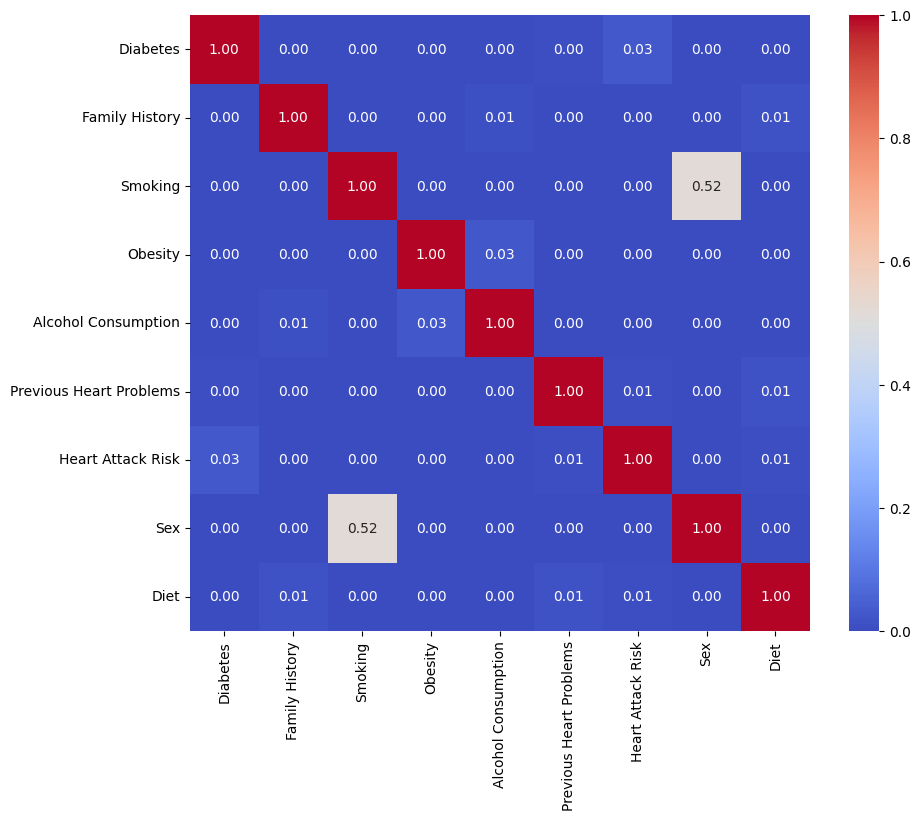

In [19]:
import numpy as np
from scipy.stats import chi2_contingency






# nous utilisons le V de cramer car nos observations sont ici qualitative et indépendante et nous avons une matrice
# carré 

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cols = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Heart Attack Risk', 'Sex', 'Diet']
cramers_v_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df1[col1], df1[col2])

import seaborn as sns
import matplotlib.pyplot as plt

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# les coefficient avec 2 fois la même variable ne sont pas à 1 car nous avons une correction de la continuité pour
# faire face au sous effectif.

In [28]:
df1[(df1['Sex'] == 0) & (df1['Smoking'] == 1)].shape[0]

4891

# Test Kmeans sur DF1

In [14]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans





# détermination du nombre de clusters
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()




ValueError: could not convert string to float: 'RDG0550'